<br><br><br>
<span style="color:red;font-size:60px">Text Understanding</span>
<br><br>
<li>sentiment analysis tells us whether a document/sentence/word is positive or negative</li>
<li>and is useful when comparing documents</li>
<li>Often, however, we want to understand something about the content of a document or corpus</li>
<li>This is a cutting edge area of research that works on:</li>
<ul>
    <li><span style="color:blue">Topic Analysis</span>: identifying major topics or themes in a corpus and then relating a document to these topics</li>
    <li><span style="color:blue">Document similarity</span>: finding the closest other document to a document</li>
    <li><span style="color:blue">Document summarization</span>: generating a meaningful summary of a document</li>
    <li><span style="color:blue">Knowledge graphs</span>: building a graph of objects and their relationships in a corpus and then using this graph to "reason" about the objects and relationships in a new document</li>
    <li><span style="color:blue">Translation</span>: constructing document coders and decoders to translate from one language to another</li>
</ul>
    

<br><br><br>
<span style="color:green;font-size:40px">Preparing a corpus</span>
<p></p>
<li>Documents and corpora are words but, for any meaningful analysis, we need to deal with numbers</li>
<li>The first step is to convert this "corpus of words" into a "corpus of numbers"</li>


<br><br><br>
<span style="color:green;font-size:30px">Bag of Words Model</span>
<p></p>
<li><span style="color:blue">Vocabulary</span> refers to the superset of all words in the corpus</li>
<li>Each word in the vocabulary can be associated with a unique integer</li>
<li>A <span style="color:blue">bag of words</span> is a JSON style dictionary that contains that maps each word in a document to the number of occurences of the word in the document. Often, the word is replaced by its unique integer position in the vocabulary</li>
<ul>
    <li>There are as many bag of words dictionaries as there are documents</li>
    <li>Each bag of word dictionary is the length of the number of unique words in the document</li>
    </ul>
<li>A <span style="color:blue">word vector</span> is a vector of the same length as the vocabulary. Each document can be represented as a word vector by entering the number of occurrences of the word in its corresponding vocabulary</li>
<ul>
    <li>There are as many word vectors as there are documents</li>
    <li>Each word vector is the length of the number of unique words in the corpus</li>
    </ul>


<span style="color:blue;font-size:large">Vocabulary example</span>
<p></p>
<li>tokenize the text</li>
<li>create a list of all the tokens</li>
<li>the index of a word in the list is its numerical equivalent</li>

In [8]:
import nltk
s1 = "Jack, a patriot, went to Boston to buy a banana"
s2 = "Jill likes to take a banana to Boston on a train"
s3 = "Habits are hard to break"
s4 = "Jack, as a patriotic American, took his flag to Boston"

words = list(set(nltk.word_tokenize(s1 + " " + s2 + " " + s3 + " " + s4)))
vocab = {v:k for k,v in enumerate(words)}
# the vocabulary is just a dictionary that counts the distinct words in a document and assigns the, 
# them an integer value  
vocab

{'patriot': 0,
 'take': 1,
 'banana': 2,
 'Habits': 3,
 'went': 4,
 'took': 5,
 'are': 6,
 'as': 7,
 ',': 8,
 'to': 9,
 'buy': 10,
 'a': 11,
 'American': 12,
 'his': 13,
 'Boston': 14,
 'Jill': 15,
 'on': 16,
 'Jack': 17,
 'flag': 18,
 'hard': 19,
 'train': 20,
 'likes': 21,
 'patriotic': 22,
 'break': 23}

In [9]:
nltk.word_tokenize(s1 + " " + s2 + " " + s3 + " " + s4)

['Jack',
 ',',
 'a',
 'patriot',
 ',',
 'went',
 'to',
 'Boston',
 'to',
 'buy',
 'a',
 'banana',
 'Jill',
 'likes',
 'to',
 'take',
 'a',
 'banana',
 'to',
 'Boston',
 'on',
 'a',
 'train',
 'Habits',
 'are',
 'hard',
 'to',
 'break',
 'Jack',
 ',',
 'as',
 'a',
 'patriotic',
 'American',
 ',',
 'took',
 'his',
 'flag',
 'to',
 'Boston']

In [10]:
words

['patriot',
 'take',
 'banana',
 'Habits',
 'went',
 'took',
 'are',
 'as',
 ',',
 'to',
 'buy',
 'a',
 'American',
 'his',
 'Boston',
 'Jill',
 'on',
 'Jack',
 'flag',
 'hard',
 'train',
 'likes',
 'patriotic',
 'break']

In [11]:
# the lenght of the vocab is the number of unique words 
len(vocab)

24

<span style="color:blue;font-size:large">Bag of Words</span>


In [12]:
corpus = [s1,s2,s3,s4] # multiple documents
bow = list()
for doc in corpus:
    bow_doc = dict()
    for  word in doc.split(" "):
        bow_doc[word] = bow_doc.get(word,0)+1
    bow.append(bow_doc)
# so we just go0 the word_cont dictionary of each document 
bow

[{'Jack,': 1,
  'a': 2,
  'patriot,': 1,
  'went': 1,
  'to': 2,
  'Boston': 1,
  'buy': 1,
  'banana': 1},
 {'Jill': 1,
  'likes': 1,
  'to': 2,
  'take': 1,
  'a': 2,
  'banana': 1,
  'Boston': 1,
  'on': 1,
  'train': 1},
 {'Habits': 1, 'are': 1, 'hard': 1, 'to': 1, 'break': 1},
 {'Jack,': 1,
  'as': 1,
  'a': 1,
  'patriotic': 1,
  'American,': 1,
  'took': 1,
  'his': 1,
  'flag': 1,
  'to': 1,
  'Boston': 1}]

<span style="color:blue;font-size:large">Word vector example</span>
<p></p>
<li>Each document or sentence (the unit of analysis) is converted into a word vector</li>
<li>Create a list of the same length as the vocabulary with all values = 0</li>
<li>word tokenize the document</li>
<li>iterate through the tokens, find the associated index of the token in the vocab, increment the count by one in the word vector</li>

In [13]:
[0]*len(vocab)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
#Functionalizing
#s2 = "Jill likes to take a banana to Boston on a train"
def get_word_vec(sentence,vocab):
    words = nltk.word_tokenize(sentence)
    vec = [0]*len(vocab)
    for word in words:
        ind = vocab[word]
        vec[ind]+=1
    return vec

word_vecs = list()
for doc in corpus:
    word_vecs.append(get_word_vec(doc,vocab))
word_vecs

[[1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]]

<span style="color:green;font-size:xx-large">Cleaning the vocabulary</span>
<p></p>
<li>The vocabulary is the starting point of the analysis so getting it right is important</li>
<li>Including all the words will result in a large number of <span style="color:blue">sparsely populated vectors</span></li>
<li>Trying to limit the vocabulary to only useful words is an important, often subjective, preprocessing step</li>
<li>Some general approaches</li>
<ul>
    <li>Get rid of general words that have little interpretive value ("to", "a", "on", "are")</li>
    <li>Create your own vocabulary of useful words</li>
    <li>Convert everything to lowercase so that case differences are not treated as differences</li>
    <li>Use a <span style="color:blue">stemming algorithm</span> to reduce words to their stem words (<span style="color:red">having</span>, <span style="color:red">have</span>, <span style="color:red">had</span> are all stemmed as <span style="color:red">have</span>)</li>
    <li>Remove punctuation or words that contain non-alpha characters</li>
    <li>Remove very short words (2, 3 letters) if that makes sense in your domain</li>

<span style="color:blue;font-size:large">Removing stopwords</span>
<p></p>
<li>nltk provides a list of common words</li>
<li>Often, you can use your own list of unimportant words</li>

In [15]:
#Create a list of unimportant words (often supplied as STOPWORDS)
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
#Create a list of unimportant words (often supplied as STOPWORDS)
import nltk
from nltk.corpus import stopwords
[w for w in set(nltk.word_tokenize(s1 + " " + s2 + " " + s3 + " " + s4)) if w not in stopwords.words('english')]

['patriot',
 'take',
 'banana',
 'Habits',
 'went',
 'took',
 ',',
 'buy',
 'American',
 'Boston',
 'Jill',
 'Jack',
 'flag',
 'hard',
 'train',
 'likes',
 'patriotic',
 'break']

<span style="color:blue;font-size:large">Removing punctuation and convert to lower case</span>
<p></p>
<li>The function <span style="color:blue">isalpha</span> returns True if all characters in a string are letters</li>
<li>The function <span style="color:blue">lower</span> returns the lowercase version of a string</li>

In [17]:
vocab = [w.lower() for w in set(nltk.word_tokenize(s1 + " " + s2 + " " + s3 + " " + s4)) if w not in stopwords.words('english') and w.isalpha()]
vocab

['patriot',
 'take',
 'banana',
 'habits',
 'went',
 'took',
 'buy',
 'american',
 'boston',
 'jill',
 'jack',
 'flag',
 'hard',
 'train',
 'likes',
 'patriotic',
 'break']

<span style="color:blue;font-size:large">Use word stems and lemmas</span>
<p></p>
<li><span style="color:blue">stemming</span> is the process of chopping off extraneous letters from a word to get to its root</li>
<li>For example, patriotic and patriotism both have patriot as their root</li>
<li><span style="color:blue">lemmatization</span> is the process of converting a word into its base form</li>
<li>For example, take and took are both forms of the base verb take</li>


<span style="color:blue;font-size:large">Lemmas</span>
<p></p>
<li>Lemmatization using spaCy</li>
<li>Note that words are converted to their base form but not stemmed</li>

In [18]:
import spacy
nlp = spacy.load('en_core_web_md')
doc = nlp("Jack the patriot takes his mom who took her rollerblades to patriotic Boston")
for token in doc:
    print(token, token.lemma, token.lemma_)

Jack 9948091532251288780 Jack
the 7425985699627899538 the
patriot 15964855605178703125 patriot
takes 6789454535283781228 take
his 2661093235354845946 his
mom 13669990404442017371 mom
who 3876862883474502309 who
took 6789454535283781228 take
her 4115755726172261197 her
rollerblades 17471066303817376993 rollerblade
to 3791531372978436496 to
patriotic 5572050039450085576 patriotic
Boston 4866123274559977282 Boston


In [19]:
import spacy
nlp = spacy.load('en_core_web_md')
doc = nlp(s1 + " " + s2 + " " + s3 + " " + s4)
words = [w.lemma_ for w in doc]
vocab = set([w.lower() for w in words if w not in stopwords.words('english') and w.isalpha()])
vocab


{'american',
 'banana',
 'boston',
 'break',
 'buy',
 'flag',
 'go',
 'habit',
 'hard',
 'jack',
 'jill',
 'like',
 'patriot',
 'patriotic',
 'take',
 'train'}

<span style="color:blue;font-size:large">Stemming</span>
<p></p>
<li>nltk has several stemming algorithms</li>
<li>we'll use porter stemmer</li>


In [20]:
import nltk
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
print(p_stemmer.stem("Patriotic".lower()))
print(p_stemmer.stem("Patriotism".lower()))
print(p_stemmer.stem("his".lower())) #Sometimes, this can be weird! 

patriot
patriot
hi


In [21]:
import spacy
import nltk
from nltk.stem.porter import PorterStemmer
nlp = spacy.load('en_core_web_md')#spacy.load('en_core_web_sm')
p_stemmer = PorterStemmer()
doc = nlp(s1 + " " + s2 + " " + s3 + " " + s4)
words = [p_stemmer.stem(w.lemma_) for w in doc]
vocab = [set(w.lower() for w in words if w not in stopwords.words('english') and w.isalpha())]
vocab

[{'american',
  'banana',
  'boston',
  'break',
  'buy',
  'flag',
  'go',
  'habit',
  'hard',
  'hi',
  'jack',
  'jill',
  'like',
  'patriot',
  'take',
  'train'}]

<span style="color:blue;font-size:large">Remove very short words</span>
<p></p>


In [22]:
import spacy
import nltk
from nltk.stem.porter import PorterStemmer
nlp = spacy.load('en_core_web_md') #spacy.load('en_core_web_sm')
p_stemmer = PorterStemmer()
doc = nlp(s1 + " " + s2 + " " + s3 + " " + s4)
words = [p_stemmer.stem(w.lemma_) for w in doc]
vocab = [set(w.lower() for w in words if w not in stopwords.words('english') and w.isalpha() and len(w)>2)]
vocab

[{'american',
  'banana',
  'boston',
  'break',
  'buy',
  'flag',
  'habit',
  'hard',
  'jack',
  'jill',
  'like',
  'patriot',
  'take',
  'train'}]

<span style="color:green;font-size:xx-large">Creating word vectors</span>
<p></p>
<li>from each document include only words, after lemmatization and stemming, that are in the vocabulary</li>


<span style="color:blue;font-size:x-large">A function that cleans documents and generates vocab</span>
<p></p>
<li>stem and lemmatize all words in each document</li>
<li>converts everything to lower case</li>
<li>removes stopwords and words less than a certain length</li>
<li>removes non-alpha words (and punctuation)</li>
<li>each document then becomes a list of acceptable words (in sequence)</li>

In [23]:
s1 = "Jack, a patriot, went to Boston to buy a banana"
s2 = "Jill likes to take a banana to Boston on a train"
s3 = "Habits are hard to break"
s4 = "Jack, as a patriotic American, took his flag to Boston"
corpus = [('s1',s1),('s2',s2),('s3',s3),('s4',s4)]
domain_stop_words = {"american"}
def stem_and_lemmatize_corpus(corpus,min_length=3):
    import spacy
    import nltk
    from nltk.stem.porter import PorterStemmer
    from nltk.corpus import stopwords
    nlp = spacy.load('en_core_web_md')
    p_stemmer = PorterStemmer()

    #Clean up the documents
    new_doc_list = list()
    for document in corpus:
        doc = nlp(document[1])
        words = [p_stemmer.stem(w.lemma_).lower() for w in doc]    
        words = [w for w in words if len(w)>min_length and w.isalpha() and w not in stopwords.words("english") and w not in domain_stop_words]
        new_doc_list.append((document[0],words))
    docs_only = [w for w in [v[1] for v in new_doc_list]]
    words = list({w for item in docs_only for w in item})
    vocab = {v:k for k,v in enumerate(words)}

    return new_doc_list,vocab



In [24]:
clean_corpus, vocab = stem_and_lemmatize_corpus(corpus)
clean_corpus

[('s1', ['jack', 'patriot', 'boston', 'banana']),
 ('s2', ['jill', 'like', 'take', 'banana', 'boston', 'train']),
 ('s3', ['habit', 'hard', 'break']),
 ('s4', ['jack', 'patriot', 'take', 'flag', 'boston'])]

In [25]:
clean_corpus

[('s1', ['jack', 'patriot', 'boston', 'banana']),
 ('s2', ['jill', 'like', 'take', 'banana', 'boston', 'train']),
 ('s3', ['habit', 'hard', 'break']),
 ('s4', ['jack', 'patriot', 'take', 'flag', 'boston'])]

In [26]:
len(vocab)

12

In [27]:
vocab

{'flag': 0,
 'patriot': 1,
 'take': 2,
 'banana': 3,
 'boston': 4,
 'hard': 5,
 'train': 6,
 'jill': 7,
 'like': 8,
 'break': 9,
 'habit': 10,
 'jack': 11}

<span style="color:blue;font-size:x-large">Generate the word vectors</span>
<p></p>
<li>Modify our get_word_vec function so that it takes a corpus as an input and outputs a set of word vectors, one per document</li>
<li><span style="color:red">Finally!</span> Our text is ready for analysis!</li>

In [28]:
def get_word_vectors(corpus,vocab):
    vector_list = list()
    for doc in corpus:
        vec = [0] * len(vocab)
        for word in doc[1]:
            try:
                ind = vocab[word]
                vec[ind]+=1
            except:
                pass    
        vector_list.append([doc[0],vec]) 
    return vector_list

    


In [29]:
clean_corpus

[('s1', ['jack', 'patriot', 'boston', 'banana']),
 ('s2', ['jill', 'like', 'take', 'banana', 'boston', 'train']),
 ('s3', ['habit', 'hard', 'break']),
 ('s4', ['jack', 'patriot', 'take', 'flag', 'boston'])]

In [30]:
word_vectors = get_word_vectors(clean_corpus,vocab)
word_vectors

[['s1', [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]],
 ['s2', [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]],
 ['s3', [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]],
 ['s4', [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]]]

<span style="color:blue;font-size:large">Why do all this?</span>
<p></p>
<li>Bottom line: Analytics must be done on numbers not on text</li>
<li>Too many unnecessary words can be confusing</li>
<li>Words that are alike, but differ marginally should be treated as the same word</li>
<li>Words that have the same meaning should be treated as the same word</li>

<li>Example: similarity between sentences (<a href="https://en.wikipedia.org/wiki/Cosine_similarity">cosine similarity</a>)</li>
<li>We can easily figure out that s1 is more similar to s4 than it is to s3</li>
<li><b>Downside</b>: While this makes analysis possible, the order of words, which is possibly valuable information, is discarded. 

In [31]:
s1 = "Jack, a patriot, went to Boston to buy a banana"
s2 = "Jill likes to take a banana to Boston on a train"
s3 = "Habits are hard to break"
s4 = "Jack, as a patriotic American, took his flag to Boston"


from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([word_vectors[0][1],word_vectors[1][1],word_vectors[2][1],word_vectors[3][1]])

array([[1.        , 0.40824829, 0.        , 0.67082039],
       [0.40824829, 1.        , 0.        , 0.36514837],
       [0.        , 0.        , 1.        , 0.        ],
       [0.67082039, 0.36514837, 0.        , 1.        ]])

<br><br><br><br>
<span style="color:red;font-size:60px">Topic modeling</span>
<br><br>
<p></p>
<li>The goal of topic modeling is to identify the major concepts underlying a piece of text
<li>Topic modeling uses "Unsupervised Learning". No a-priori knowledge is necessary
<li>Though, a-priori knowledge is important for contextualizing results

<span style="color:green;font-size:30px">LDA: Latent Dirichlet Allocation</span>
<p></p>
<li>A technique for topic modeling
<li>Basic assumptions:
<ol>
    <li>a document is associated with several topics</li>
    <li>the topics vary in importance</li>
    <li>documents are constructed by drawing words from a universe of words (aka "bag of words" or vocab)</li>
    <li>topics are distributed across a probability distribution of words from this bag of words</li>
    <li>each topic is represented in the document by the distribution of words associated with the topic in the document </li>

</ol>
<li>Given these assumptions, LDA scans a corpus and tries to deduce the topic and word distributions in the corpus</li>


<span style="color:blue;font-size:x-large">Example</span>
<li>Document 1: (dog, cat, rat, and, the, goat)</li>
<li>Document 2: (dog, chair, table, and, the, bed)</li>
<li>Document 3: (dog, cat, chair, bed, the, goat)</li>

Assuming 2 topics, t1 and t2, LDA builds the following associations:
<p>
    <img src="lsa.png">
    </p>

<li>Each topic is then defined by the top n words in order of probabilities</li>
<li>And each document is associated with the high probability probabilities from documents to topics</li>
<li>The details of LDA are not in the scope of this class but, if interested, read:</li>
<ul>
    <li><a href="https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf">the original paper</a></li>
    <li><a href="https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d">this article on medium</a></li>

<span style="color:green;font-size:x-large">term frequency (tf) and inverse document frequency (idf)</span>
<li><span style="color:red">term frequency</span>: term frequency refers to the number of times a word occurs in a document</li>
<li><span style="color:red">inverse document frequency</span>: refers to the number of documents that contain a word</li>
<li>The idea is that the more often a document references a word, the more likely that word will be useful in identifying a topic</li>
<li>But, the main purpose of topic analysis is to group documents into <b>different</b> topics. A word that occurs in many documents in a corpus is less likely to be useful in discriminating between documents</li>
<li>tf-idf methodologies increase the liklihood of a word belonging to a topic if it is frequent in a document but decrease that liklihood if the word is freqently used in many documents</li>
<li>Example:</li>
<ul>
    <li>Document 1: (dog, cat, rat, ate, the, cat)</li>
    <li>Document 2: (dog, chair, table, and, the, chair)</li>
    <li>Document 3: (dog, cat, chair, chased, the, cat)</li>
    <li>"dog" occurs in all documents. It's not going to be helpful in discriminating between documents</li>
    <li>"cat" occurs twice in documents 1 and 3. It is likely to be a topic identifier</li>
    <li>"chair" occurs twice in one document. It is also likely to be a topic identifier</li>
</ul>
<li>Most topic analysis techniques use the basic ideas of tf-idf in some way when finding topics</li>
    

<span style="color:blue;font-size:x-large">Slate stories topics</span>
<p></p>
<li>Let's examine the major topics in the news by extracting them from our slate corpus</li>
<li>Get the stories by scraping slate.com</li>
<li>Get the vocabulary</li>
<li>We'll use gensim's own word vector model rather than ours</li>
<li>Train the LDA model</li>

In [32]:
def get_slate_stories():
    #followable_links contains the links to news and politics stories
    import requests
    from bs4 import BeautifulSoup
    url="https://www.slate.com"
    page = requests.get(url)
    bs_page = BeautifulSoup(page.content,'lxml')
    all_links = bs_page.find_all('a')
    
    #Define the list of categories that we want to follow
    categories = ['news-and-politics','business','technology','culture']
    
    #followable_links will contain the title and the detail of each story
    followable_links = set()
    for link in all_links:
        href = link.get('href') #get the link
        if href: #If the link exists (sometimes it doesn't!)
            for cat in categories:
                if cat in href: #Only stories in the category
                    title = link.get_text().strip() #Get the story title
                    followable_links.add((title,href)) #Append (title, link) to followable links
    
    
    #Iterate through followable links extracting the text of each story
    #story_list is a list of the stories
    #Note that some links will not contain an article_body section, those will be ignored (that's why the try except)
    story_list = list()
    count=0
    for link in followable_links:
        try:
            page=BeautifulSoup(requests.get(link[1]).content,'lxml')
            text=page.find('body').find('section',class_='article__body').get_text().strip()
            story_list.append((link[0],text))
            count+=1
        except:
            continue
    return story_list

def lemmatize_corpus(corpus,min_length=3):
    import spacy
    import nltk
    from nltk.stem.porter import PorterStemmer
    from nltk.corpus import stopwords
    nlp = spacy.load('en_core_web_md')
    p_stemmer = PorterStemmer()
    domain_stop_words = {"advertisement","medium","somewhere","somewhat","america"}

    #Clean up the documents
    new_doc_list = list()
    for document in corpus:
        doc = nlp(document[1])
        #We won't stem the words
        words = [(w.lemma_).lower() for w in doc]    
        words = [w for w in words if len(w)>min_length and w.isalpha() and w not in stopwords.words("english") and w not in domain_stop_words]
        new_doc_list.append((document[0],words))
    docs_only = [w for w in [v[1] for v in new_doc_list]]
    words = list({w for item in docs_only for w in item})
    vocab = {v:k for k,v in enumerate(words)}

    return new_doc_list,vocab

def get_word_vectors(corpus,vocab):
    vector_list = list()
    for doc in corpus:
        vec = [0] * len(vocab)
        for word in doc[1]:
            try:
                ind = vocab.index(word)
                vec[ind]+=1
            except:
                pass    
        vector_list.append([doc[0],vec]) 
    return vector_list

    
slate_corpus = get_slate_stories()

clean_slate_corpus,vocab = lemmatize_corpus(slate_corpus,5)
#slate_vectors = get_word_vectors(clean_slate_corpus,vocab) #We won't use this

In [33]:
clean_slate_corpus

[('Republicans Have a New Plan to Save the Supreme Court Abortion Pill Case\n        \n\n            Susan Rinkunas',
  ['comment',
   'election',
   'lawyer',
   'something',
   'courtroom',
   'notorious',
   'country',
   'lawsuit',
   'revoke',
   'approval',
   'abortion',
   'mifepristone',
   'almost',
   'currently',
   'supreme',
   'appeal',
   'expert',
   'abortion',
   'doctor',
   'people',
   'doctor',
   'explain',
   'friday',
   'republican',
   'attorney',
   'general',
   'missouri',
   'kansas',
   'motion',
   'intervene',
   'matthew',
   'kacsmaryk',
   'injure',
   'approval',
   'abortion',
   'republican',
   'eleventh',
   'certainly',
   'worried',
   'scotus',
   'plaintiff',
   'doctor',
   'shadowy',
   'alliance',
   'hippocratic',
   'medicine',
   'andrew',
   'bailey',
   'missouri',
   'kobach',
   'kansas',
   'labrador',
   'support',
   'motion',
   'administration',
   'petition',
   'supreme',
   'analysis',
   'attack',
   'private',
   'plain

In [34]:
vocab

{'dismay': 0,
 'jonathan': 1,
 'dominic': 2,
 'enough': 3,
 'flourishing': 4,
 'newish': 5,
 'sympathetic': 6,
 'brennan': 7,
 'session': 8,
 'multibillion': 9,
 'canada': 10,
 'professor': 11,
 'israel': 12,
 'violence': 13,
 'reinvite': 14,
 'company': 15,
 'conflict': 16,
 'enterprise': 17,
 'biography': 18,
 'discourage': 19,
 'experience': 20,
 'creation': 21,
 'architect': 22,
 'vapidity': 23,
 'anthony': 24,
 'miscarriage': 25,
 'hotness': 26,
 'immune': 27,
 'motorboat': 28,
 'spigot': 29,
 'empire': 30,
 'average': 31,
 'reality': 32,
 'voting': 33,
 'entire': 34,
 'disappear': 35,
 'executive': 36,
 'afraid': 37,
 'variously': 38,
 'complex': 39,
 'compass': 40,
 'monday': 41,
 'grandchild': 42,
 'missouri': 43,
 'abundantly': 44,
 'appeal': 45,
 'fundamental': 46,
 'privilege': 47,
 'assign': 48,
 'breach': 49,
 'course': 50,
 'location': 51,
 'herlihy': 52,
 'boomer': 53,
 'boring': 54,
 'randomly': 55,
 'hinduism': 56,
 'estate': 57,
 'remain': 58,
 'wisdom': 59,
 'prosecu

<span style="color:blue;font-size:x-large">LDA Model:</span>
<p></p>
<li>Number of topics: The number of topics you want generated. 
<li>Passes: The LDA model makes through the document. More passes, slower analysis


<span style="color:blue;font-size:x-large">Rough procedure</span>
<p></p>

<li>LDA first randomly assigns words to each topic</li>
<li>Then it computes $p(t|d)$ - the probability that a topic is associated with a document (the percentage of document d words that are in t)</li>
<li>And computes $p(w|t)$ - the probability that a word is associated with a topic (the percentage of documents that contain the word/topic combination</li>
<li>Then, if $p(t1|d1) * p(w|t1) < p(t2|d1) * p(w|t2)$, LDA switches the word from topic 1 to topic 2 in document 1 for all word/document combinations</li>
<li>And repeats for n passes</li>
<li>lda provides these two probabilities =$p(t|d)$ and $p(w|t)$ at the end of the passes</li>
<p></p>
<img src="lda.png">

In [35]:
!pip install gensim --upgrade

In [36]:
import gensim
gensim.__version__

'4.3.2'

In [37]:
import numpy
numpy.__version__

'1.26.2'

In [38]:
#Gensim uses a dictionary object that maps words and integers (the vocabulary)
#An object with keys = integers, values = words
#the dictionary is useful for reverse lookup, i.e., going from a word number to the actual word</li>

from gensim.corpora.dictionary import Dictionary 
from gensim.models.ldamodel import LdaModel

slate_texts = [d[1] for d in clean_slate_corpus] #extract the texts into a list (get rid of titles)
slate_dictionary = Dictionary(slate_texts) #Create the vocab dictionary
slate_topic_corpus = [slate_dictionary.doc2bow(doc) for doc in slate_texts] #(word, frequency) pairs for each doc
lda = LdaModel(slate_topic_corpus,id2word=slate_dictionary,num_topics=5,passes=10) #build the lda model

In [39]:
slate_texts

[['comment',
  'election',
  'lawyer',
  'something',
  'courtroom',
  'notorious',
  'country',
  'lawsuit',
  'revoke',
  'approval',
  'abortion',
  'mifepristone',
  'almost',
  'currently',
  'supreme',
  'appeal',
  'expert',
  'abortion',
  'doctor',
  'people',
  'doctor',
  'explain',
  'friday',
  'republican',
  'attorney',
  'general',
  'missouri',
  'kansas',
  'motion',
  'intervene',
  'matthew',
  'kacsmaryk',
  'injure',
  'approval',
  'abortion',
  'republican',
  'eleventh',
  'certainly',
  'worried',
  'scotus',
  'plaintiff',
  'doctor',
  'shadowy',
  'alliance',
  'hippocratic',
  'medicine',
  'andrew',
  'bailey',
  'missouri',
  'kobach',
  'kansas',
  'labrador',
  'support',
  'motion',
  'administration',
  'petition',
  'supreme',
  'analysis',
  'attack',
  'private',
  'plaintiff',
  'theory',
  'standing',
  'standing',
  'include',
  'doctor',
  'shield',
  'mifepristone',
  'resident',
  'ability',
  'enforce',
  'abortion',
  'restriction',
  'mer

In [40]:
slate_topic_corpus

[[(0, 1),
  (1, 1),
  (2, 9),
  (3, 1),
  (4, 3),
  (5, 2),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 4),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 6),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 2),
  (89, 7),
  (90, 3),
  (91, 2)

In [41]:
slate_dictionary.id2token

{0: 'abandon',
 1: 'ability',
 2: 'abortion',
 3: 'absent',
 4: 'administration',
 5: 'alliance',
 6: 'almost',
 7: 'already',
 8: 'alternative',
 9: 'analysis',
 10: 'andrew',
 11: 'anyone',
 12: 'appeal',
 13: 'appear',
 14: 'appellate',
 15: 'approval',
 16: 'approve',
 17: 'argument',
 18: 'attack',
 19: 'attempt',
 20: 'attorney',
 21: 'backstop',
 22: 'bailey',
 23: 'ballot',
 24: 'believe',
 25: 'benefit',
 26: 'blowback',
 27: 'briefing',
 28: 'california',
 29: 'candidate',
 30: 'certainly',
 31: 'certiorari',
 32: 'chance',
 33: 'clarence',
 34: 'cleanly',
 35: 'comment',
 36: 'complaint',
 37: 'conference',
 38: 'congress',
 39: 'consensus',
 40: 'consider',
 41: 'country',
 42: 'courtroom',
 43: 'courts',
 44: 'currently',
 45: 'cynical',
 46: 'defend',
 47: 'defense',
 48: 'department',
 49: 'deserve',
 50: 'design',
 51: 'district',
 52: 'docket',
 53: 'doctor',
 54: 'effect',
 55: 'efficient',
 56: 'effort',
 57: 'election',
 58: 'eleventh',
 59: 'elizabeth',
 60: 'enfor

<span style="color:blue;font-size:x-large">Result: topic word probabilities</span>
<p></p>
<li>print_topics returns the num_words most probable words associated with a topic</li>


In [42]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=8))

[   (   0,
        '0.044*"santos" + 0.012*"george" + 0.007*"congress" + 0.005*"nothing" '
        '+ 0.005*"republican" + 0.005*"campaign" + 0.005*"federal" + '
        '0.005*"jewish"'),
    (   1,
        '0.015*"abortion" + 0.007*"please" + 0.007*"president" + '
        '0.006*"ballot" + 0.006*"comment" + 0.006*"treasure" + 0.006*"destroy" '
        '+ 0.006*"musical"'),
    (   2,
        '0.010*"election" + 0.009*"people" + 0.009*"tiktok" + 0.007*"social" + '
        '0.006*"letter" + 0.006*"comment" + 0.005*"motion" + 0.005*"bachelor"'),
    (   3,
        '0.025*"social" + 0.022*"security" + 0.015*"openai" + 0.015*"altman" + '
        '0.014*"google" + 0.013*"search" + 0.009*"people" + 0.009*"company"'),
    (   4,
        '0.019*"twitter" + 0.016*"people" + 0.016*"jewish" + 0.014*"problem" + '
        '0.009*"company" + 0.009*"business" + 0.007*"platform" + '
        '0.007*"antisemitic"')]


<span style="color:blue;font-size:x-large">Result: topic document probabilities</span>
<p></p>
<li>get_document_topics returns the probability distribution of topics for a given document (vectorized)</li>

In [43]:
from operator import itemgetter
lda.get_document_topics(slate_topic_corpus[2],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(slate_topic_corpus[2],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)


[(2, 0.99837637),
 (3, 0.00040827517),
 (1, 0.00040592227),
 (0, 0.00040498294),
 (4, 0.000404425)]

In [44]:
slate_corpus[2]

('Keeping Up With the Trump Trials: What We Learned From the Testimony Leak\n            \n\nShirin Ali',
 'Tweet\n  \n\n\n\nShare\n\n\n\n\nShare\n\n\n\n\nComment\n    \n\n\n\n\nKeeping up with Donald Trump’s court schedule is a dizzying task, since he faces two federal trials, a criminal trial in Georgia, and a separate civil trial and criminal trial in New York. (Oh, and he’s running for president.) To make things easier, we’ll be recapping the biggest Trump trial news at the end of each week.\xa0\nThis week, testimony from four of Trump’s co-defendants in the Georgia election interference case leaked to the press in what prosecutors are calling an attempt to intimidate future witnesses.\n\n\n\n\nMeanwhile, in New York, Trump’s lawyers began presenting their defense in his New York civil fraud trial. And in Florida, the judge made a decision about whether the federal government’s classified documents trial should be moved.\n\n\n\n1. Georgia defendants’ testimony leaks\n\n\nVideo foot

<span style="color:blue;font-size:x-large">Applying the model to a new document</span>
<li>When a new document comes in
<li>See which topic(s) it matches
<li>We'll grab the first story on politico (if this works!)

In [45]:
import requests
from bs4 import BeautifulSoup

url = "https://www.politico.com"
page = requests.get(url)
soup = BeautifulSoup(page.text)
links = soup.find_all('a',class_="js-tealium-tracking")
legit_links = list()
for link in links:
    if "https://www.politico.com/news" in link.get('href') and "2023" in link.get('href'):
        legit_links.append(link)
new_url = legit_links[0].get('href')
new_soup = BeautifulSoup(requests.get(new_url).text)
newdoc = ''
for p in new_soup.find_all('p',class_="story-text__paragraph"):
    newdoc += p.get_text()
newdoc    

'Democratic strategist David Axelrod still doesn’t think the Biden camp should get too comfortable about the president’s reelection prospects.“I think he has a 50-50 shot here, but no better than that, maybe a little worse,” Axelrod told New York Times columnist Maureen Dowd. “He thinks he can cheat nature here and it’s really risky. They’ve got a real problem if they’re counting on Trump to win it for them. I remember Hillary doing that, too.”Axelrod recently suggested President Joe Biden should consider his reelection bid carefully, prompting ire from the president, who reportedly called the strategist a “prick.”His unsolicited advice followed a New York Times/Sienna College poll that showed Biden trailing former president Donald Trump among voters in five key battleground states.“I don’t care about them thinking I’m a prick — that’s fine,” Axelrod told Dowd. “I hope they don’t think the polls are wrong because they’re not.”Despite disappointing poll results and approval ratings, and

<li>Clean and set up the text
<li>Create the word frequencies for this document using the original dictionary
<li>You cannot add to the vocabulary when a new document arrives!

In [46]:
slate_dictionary.doc2bow(newdoc.lower().split())

[(1, 1),
 (15, 1),
 (40, 1),
 (75, 1),
 (137, 2),
 (482, 1),
 (607, 1),
 (635, 1),
 (730, 1),
 (734, 1),
 (854, 1),
 (879, 1),
 (898, 1),
 (1066, 2),
 (1181, 1),
 (1319, 1),
 (1372, 1),
 (1926, 1),
 (2098, 1),
 (2158, 1),
 (2246, 1),
 (2655, 1)]

In [49]:
newdoc.lower().split()

['democratic',
 'strategist',
 'david',
 'axelrod',
 'still',
 'doesn’t',
 'think',
 'the',
 'biden',
 'camp',
 'should',
 'get',
 'too',
 'comfortable',
 'about',
 'the',
 'president’s',
 'reelection',
 'prospects.“i',
 'think',
 'he',
 'has',
 'a',
 '50-50',
 'shot',
 'here,',
 'but',
 'no',
 'better',
 'than',
 'that,',
 'maybe',
 'a',
 'little',
 'worse,”',
 'axelrod',
 'told',
 'new',
 'york',
 'times',
 'columnist',
 'maureen',
 'dowd.',
 '“he',
 'thinks',
 'he',
 'can',
 'cheat',
 'nature',
 'here',
 'and',
 'it’s',
 'really',
 'risky.',
 'they’ve',
 'got',
 'a',
 'real',
 'problem',
 'if',
 'they’re',
 'counting',
 'on',
 'trump',
 'to',
 'win',
 'it',
 'for',
 'them.',
 'i',
 'remember',
 'hillary',
 'doing',
 'that,',
 'too.”axelrod',
 'recently',
 'suggested',
 'president',
 'joe',
 'biden',
 'should',
 'consider',
 'his',
 'reelection',
 'bid',
 'carefully,',
 'prompting',
 'ire',
 'from',
 'the',
 'president,',
 'who',
 'reportedly',
 'called',
 'the',
 'strategist',
 'a',

In [47]:
from nltk import word_tokenize
corpus_new = slate_dictionary.doc2bow(newdoc.lower().split())
sorted(lda.get_document_topics(corpus_new,minimum_probability=0,per_word_topics=False),key=lambda x: x[1],reverse=True)



[(1, 0.4044821),
 (3, 0.29423127),
 (2, 0.21469285),
 (0, 0.07847293),
 (4, 0.008120883)]

In [48]:
corpus_new

[(1, 1),
 (15, 1),
 (40, 1),
 (75, 1),
 (137, 2),
 (482, 1),
 (607, 1),
 (635, 1),
 (730, 1),
 (734, 1),
 (854, 1),
 (879, 1),
 (898, 1),
 (1066, 2),
 (1181, 1),
 (1319, 1),
 (1372, 1),
 (1926, 1),
 (2098, 1),
 (2158, 1),
 (2246, 1),
 (2655, 1)]

In [52]:
lda.print_topic(topicno=2)

'0.020*"michigan" + 0.015*"political" + 0.011*"lawyer" + 0.009*"people" + 0.007*"college" + 0.007*"harbaugh" + 0.006*"school" + 0.006*"really" + 0.006*"ballot" + 0.006*"campaign"'

<span style="color:green;font-size:30px">Interpreting topics</span>
<p></p>
<li>What is the meaning of a topic? (what do the bunch of words and probabilities mean?)
<li>How prevalent is the topic? (the relative weight of a topic across a corpus)
<li>How do the topics relate to each other (are there overlaps? do they talk about the same essential thing?)


<span style="color:blue;font-size:x-large">Interpretation through word clouds</span>
<p></p>
<li>to better understand the topic we can draw wordclouds weighted by the weight of the terms in the topic</li>
<li>the function, draw_word_clouds, draws the word clouds for all topics</li>

In [53]:
!pip install wordcloud==1.8.2.2

     |████████████████████████████████| 160 kB 6.3 MB/s eta 0:00:01


In [54]:
import wordcloud
wordcloud.__version__

'1.8.2.2'

In [55]:
#show_topic returns the word, prob pairs for a topic
for word,prob in lda.show_topic(1,topn=20):
    print(word,prob)

platform 0.017184878
speech 0.011054752
government 0.011046552
public 0.010087571
social 0.009109625
official 0.009105562
whether 0.0081560835
remove 0.0065350137
communicate 0.0058787446
comment 0.005570265
amendment 0.0052526193
supreme 0.0052449815
zepbound 0.005217456
another 0.004909207
control 0.0045982767
content 0.0045875413
globus 0.00457446
hitchhiker 0.00424107
question 0.0039590024
company 0.003945215


In [56]:
def draw_word_clouds(lda,num_topics,max_topic_words=30):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    from random import shuffle
    import math

    COL_NUM = 2
    ROW_NUM = math.ceil(num_topics/2)
    
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

    for i in range(0,num_topics):
        word_list=[]
        prob_total = 0
        for word,prob in lda.show_topic(i,topn=max_topic_words):
            prob_total +=prob
        for word,prob in lda.show_topic(i,topn=max_topic_words):
            if word in STOPWORDS:
                continue
            freq = int(prob/prob_total*1000)
            alist=[word]
            word_list.extend(alist*freq)
            shuffle(word_list)
            text = ' '.join(word_list)
            wordcloud = WordCloud(stopwords=STOPWORDS,max_words=20).generate(text)
            ax = axes[i//2, i%2] 
            ax.set_title("topic " + str(i))
            ax.imshow(wordcloud)
            ax.axis('off')
    plt.show()    
    

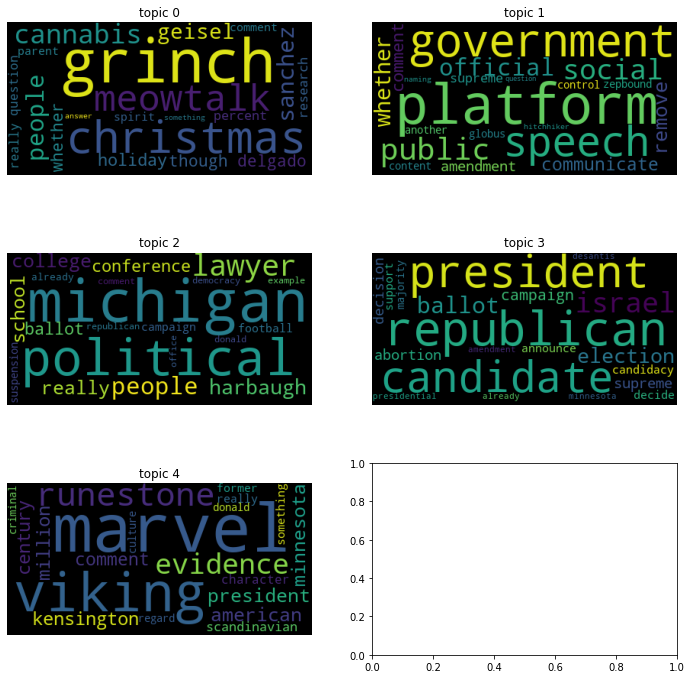

In [57]:
draw_word_clouds(lda,5,30)

<span style="color:blue;font-size:x-large">pyLDAvis (python LDA visualizer)</span>
<p></p>
<li>A package for visualizing the results of an LDA</li>
<li>install pyLDAvis</li>
<li>Make sure you have the latest version of scipy!</li>

    
   

In [58]:
!pip install pyLDAvis==3.4.1

     |████████████████████████████████| 2.6 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 37.3 MB 1.1 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.


In [59]:
!pip install scipy --upgrade

In [60]:
import pyLDAvis
pyLDAvis.__version__

'3.4.0'

In [61]:
import scipy
scipy.__version__

'1.7.3'

In [62]:
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(lda, slate_topic_corpus, slate_dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

<span style="color:blue;font-size:x-large">Left pane</span>
<p></p>
<li>projects topics across a 2-D space (inter-topic distances/overlaps)
<li>the area of each circle shows the relative prevalence of each topic across the corpus
<li>the distance between the circles gives an estimate of how separated the topics are

<span style="color:blue;font-size:x-large">Right pane</span>
<p></p>
<li>helps interpret terms that define a topic</li>
<li><span style="color:green">relevance</span>: tradesoff term frequency with inverse topic frequency. A term that is frequent in one topic but infrequent in other topics is more relevant for interpreting a topic</li>
<li><span style="color:green">lambda</span>: a factor used to compute relevance</li>
<li>if lambda = 1, then the words will be ordered by the weights calculated by the lda</li>
<li>if lambda = 0, then the words will be ordered by their relative rarity (i.e., the ratio of the weight calculated by the lda and the weight across all topics)</li>
<li>barchart for each topic:
<ol>
<li>blue bars: frequency of each term in the corpus.
<li>red bars: frequency within the topic. If lambda = 1, this is p(w,t) (e.g. P(dog|t2). Lambda adjusts the relevance using the overall frequency of the word.
</ol>

<li>some studies show that lambda =0.6 is a good tradeoff for well structured domains

<span style="color:green;font-size:30px">Document Similarity</span>
<p></p>
<li>Given a corpus of documents, when a new document arrives, find the document that is the most similar</li>
<li>the lda model helps find the most similar document</li>
<li>this is useful because if you know what the content of the similar document is, you can estimate the topic(s) in the new document</li>
<li>Construct a similarity matrix using the lda model (size = nxn where n is the number of documents)</li>
<li>find the topic distribution for the new document</li>
<li>match that distribution against the similarity matrix to find the closest matches</li>
<li>lda uses <a href="https://www.machinelearningplus.com/nlp/cosine-similarity/">cosine similarity </a></li>

In [50]:
slate_topic_corpus

[[(0, 1),
  (1, 1),
  (2, 9),
  (3, 1),
  (4, 3),
  (5, 2),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 4),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 6),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 2),
  (89, 7),
  (90, 3),
  (91, 2)

In [63]:
import numpy as np
from gensim.similarities import MatrixSimilarity
index = MatrixSimilarity(lda[slate_topic_corpus])
new_topic_dist = lda[corpus_new]

sims = index[new_topic_dist]
print(sims)
print("Most similar document",np.argmax(sims))

[0.6233175  0.13115427 0.5649127  0.29410934 0.25555265 0.5956527
 0.25555265 0.5956527  0.29410934 0.29410934 0.5956527  0.69006443
 0.5956527  0.25555265 0.69006443 0.5956527  0.69006443 0.25555265
 0.13115427 0.13115427 0.13115427 0.13115427 0.29410934 0.5956527
 0.5956527  0.29410934 0.13115427 0.69006443 0.5956527  0.25555265
 0.13115427 0.29410934 0.25555265 0.5956527  0.25555265 0.13115427
 0.5956527  0.5956527 ]
Most similar document 11


<span style="color:green;font-size:40px">Text summarization</span>
<p></p>
<li>Text summarization is useful because you can generate a short summary of a large piece of text automatically</li>
<li>Analysts can read the short summary and decide whether to read the actual document or not</li>
<li>Two types of text summarization</li>
<ul>
    <li><span style="color:blue">extractive:</span> The algorithm selects "important" sentences and reports these sentences as the summary </li>
    <li><span style="color:blue">abstractive:</span> build an "intelligent" abstract of the document </li> 


<span style="color:blue;font-size:xx-large">Extractive summaries</span>
<p></p>
<li>The package "sumy" provides many summarization algorithms</li>
<li><b>LexRank</b> identifies sentences that are the most similar to other sentences in the document. These are selected for the summary</li>
<li><b>LatentSemanticAnalysis</b> applies SVD (singular value decomposition) to the word frequency vector and picks the sentences with the highest loading</li>
<li><b>Luhn</b> looks at both the word frequency vector (term frequencies) as well as the <span style="color:blue">inverse document frequency (idf)</span>. idf is the inverse of the number of documents that contain a word (words that occur in more documents are discounted)</li>
<li>We'll walk through LexRank</li>


In [64]:
!pip install sumy --upgrade

     |████████████████████████████████| 97 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 754 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=0fb98dcd53396f31e87463d89f435d2c7dc1a640c417595fe35493e123209363
  Stored in directory: /Users/joshuagrajales/Library/Caches/pip/wheels/ba/9f/70/7795228568b81b57a8932755938da9fb1f291b0576752604aa
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=aca8a7e4854de61aba9e17e862f959d88bc06d4c2ca5fca1eb678836366bfe6a
  Stored in directory: /Users/joshuagrajales/Library/Caches/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=99317d94b34a411bcdd222943cdd20125e8d2db5164878c8daa462f0

In [65]:
newdoc

'Political statistician Nate Silver on Monday became the latest strategist to voice their skepticism with President Joe Biden’s ability to run for reelection in 2024.In a lengthy post on his Substack newsletter, Silver, who founded the data-focused outlet FiveThirtyEight, argued that if Biden cannot run a full-throated reelection campaign, he should “step aside” and yield to another Democratic candidate. “Democrats would be taking a huge risk by replacing Biden — but they’re also taking a huge risk by nominating him,” Silver wrote in his post. He later adds, “If Biden can’t keep up with the schedule of a typical sitting president running for re-election, or is prone to making errors when he does, voters and the media are going to notice that and Biden will wear his 80+ years like an albatross around his neck.”A spokesperson for the Biden campaign did not immediately return a request for comment.The comments from Silver, who has previously voiced doubts about Biden’s political prospects

In [66]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
my_parser = PlaintextParser.from_string(newdoc,Tokenizer('english'))
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=2)
for sentence in lexrank_summary:
    print(sentence)

Political statistician Nate Silver on Monday became the latest strategist to voice their skepticism with President Joe Biden’s ability to run for reelection in 2024.In a lengthy post on his Substack newsletter, Silver, who founded the data-focused outlet FiveThirtyEight, argued that if Biden cannot run a full-throated reelection campaign, he should “step aside” and yield to another Democratic candidate.
“Democrats would be taking a huge risk by replacing Biden — but they’re also taking a huge risk by nominating him,” Silver wrote in his post.


<span style="color:blue;font-size:xx-large">Abstractive summaries</span>
<p></p>
<li>The idea with abstractive summaries is to create new sentences that summarize the article</li>


<span style="color:blue;font-size:xx-large">Encoder-decoder models</span>
<p></p>
<li><b>Encoder</b> encodes the input into an intermediate form</li>
<li><b>Decoder</b> decodes the intermediate form into the output</li>
<li><span style="color:blue">language translation</span> from English to Italian</li>
<ul>
    <li>since English and Italian have different grammers, an English sentence needs to be appropriately encoded for ease of translation into Italian</li>
    <li>And the italian decoder has to be able to convert the encoded form of the english sentence into Italian</li>
    <li>often, the encoding or the decoding is done using a neural network (see <a href="https://en.wikipedia.org/wiki/Recurrent_neural_network">Recurrent neural networks</a>) but that's not something we'll cover here</li>
</ul>
<li>Examples of abstractive summaries using encoder-decoder models, all with pretrained English encoders:</li>
<ul>
    <li><a href="https://huggingface.co/transformers/model_doc/t5.html">T5 transformers</a></li>
    <li><a href="https://huggingface.co/transformers/model_doc/bart.html">BART transformers</a></li>
    <li><a href="https://huggingface.co/transformers/model_doc/gpt.html">GPT transformers</a></li>
</ul>
<p></p>
<img src="encoder decoder.png">

<span style="color:blue;font-size:xx-large">T5 summarizers</span>
<p></p>
<li>builds a summary by constructing its own text</li>
<li>to activate the summary module, add "summarize:" to the front of the document</li>


In [67]:
import torch,transformers,sentencepiece
print(torch.__version__)
print(transformers.__version__)
print(sentencepiece.__version__)
#1.13.1
#4.26.1
#0.1.97

ModuleNotFoundError: No module named 'torch'

In [ ]:
!pip install torch --upgrade

In [ ]:
!pip install transformers --upgrade

In [ ]:
#!pip install sentencepiece --upgrade

In [ ]:
newdoc = """
Proud and prosperous Sweden, with its famously generous welfare system and abundance of green energy, 
should – in theory – be better equipped than most European countries to bear a battering from the continent’s 
cost of living crisis.

In terms of GDP per capita, it is the EU’s fifth-richest member state. Natural gas accounts for only 2% of its 
energy, insulating it from the worst economic ravages of Russia’s war on Ukraine. Poverty is far below the European average.

But fast-rising electricity bills and surging food price inflation are taking their toll here as elsewhere. 
“Sweden also has a poverty problem,” said Johan Rindevall. “We may not talk about it much, but it’s there – and it’s 
absolutely got worse this year.”

Rindevall is well-placed to know. The 39-year-old former tech industry worker runs Matmissionen, or Food Mission, a 
unique chain of social supermarkets in Sweden that has expanded rapidly since January, more than doubling its customer 
numbers as it offers means-tested members the chance to shop for food for less.

Matmissionen’s eight stores – five in Stockholm, three of which opened this year, two in Gothenberg and one in 
Malmö – sell food donated by producers and retailers that is at risk of being wasted, usually because it has cosmetic 
blemishes, damaged packaging or a short sell-by date.

The organisation’s aim is threefold: to limit food waste, train new workers – about 70% of staff are on various job 
market insertion programmes, and 40% go on to find full-time work – and, above all, to sell food at very low prices to 
people who need it. Revenue from the stores also helps subsidise a separate foodbank operation with some donations 
distributed to NGOs working with those in the most extreme need, mostly the homeless.

Rindevall says Matmissionen works on the principle of sticking as close to a familiar shopping experience for its 
customers as it can. “Our focus groups show there’s a real stigma around food handouts. So we decided to let them buy what 
they want, albeit at a very steep discount … It’s just more empowering that way,” he says. “People want things to be as normal as possible.”

In fact anyone can shop at Matmissionen – but only registered members, who must book a slot to shop, get the lowest prices. 
Membership is open to those with a monthly income of less than 11,200 kronor (roughly £880) in pay or benefits. 
Membership prices are rock-bottom: five kronor (40p) for a loaf of bread, six for a kilo of bananas and 33 for 500g of minced beef.

It is an offer that is increasingly needed. Sweden’s welfare system has been steadily cut back in recent years, widening 
the gap between rich and poor and leaving more and more people vulnerable to inflation that has averaged about 8% this autumn.

Household incomes have also been hit by electricity bills that have in some cases doubled. More than 75% of Sweden’s electricity 
comes from hydropower, nuclear and wind, but it has not escaped the continent-wide energy price impacts of the war in Ukraine.

Petrol and food prices have soared too. The cost of butter is up by about 25% this year, meat by 24% and cheese by about 22%, 
according to consumer price comparison sites.

In practice, says Rindevall, 90-95% of purchases are by members, who can buy up to 300 kronor of food a week at the 
membership price – never more than 30% of the price in a discount supermarket – and as much as they want on top at a 
higher price. Few members are going hungry, but many are unable to afford a balanced diet: lots of carbs, little protein, few vegetables.

He says Matmissionen’s membership climbed from 7,200 in January to more than 14,700 by the end of October. The biggest group 
of newcomers, about 40% , are families with children, both single parents and couples. “Inflation at these rates mean we’re 
seeing many, many more people than ever before. Some have started coming in saying they don’t qualify as members, but can’t afford 
to buy the food they need anywhere else,” he says.

According to Sweden’s Central Statistics Office, during the country’s last major inflationary period in the early 1990s, about 7% 
of the population were in relative poverty – defined as living on 60% of less of the median income. This year, that percentage is 
estimated to be above 14%.

Matmissionen is drawing up expansion plans for new stores across the country. It recently reached agreements with both the Swedish 
food retailers’ association and the national federation of food producers and distributors, guaranteeing the support of almost the 
entire food sector.

“Sweden may still have a good safety net, but it maybe isn’t reactive enough to sudden, big cost of living changes,” says Rindevall.

“The only positive thing in all this is that now so many people are talking about impossible food prices that there’s no longer 
the same stigma in not being able to afford to feed your family. It’s no longer a taboo.”
"""

In [ ]:
from transformers import T5Tokenizer, T5Config, T5ForConditionalGeneration

#Use the pretrained encoder (you can also train your own encoder but ....)
my_model = T5ForConditionalGeneration.from_pretrained('t5-small')

#Create a tokenizer (i.e., a converter from text into tokens)
tokenizer = T5Tokenizer.from_pretrained('t5-small')


In [ ]:
text = "summarize:" + newdoc
#The encoder setup
input_ids=tokenizer.encode(text, return_tensors='pt')


In [ ]:
input_ids

In [ ]:
#Do the encoding. We're asking it to generate a minimum and maximum tokens
#The summary is represented as a list of token ids
summary = my_model.generate(input_ids,min_length=90,max_length=160)

In [ ]:
#Do the decoding. In this case, decoding is straight forward
t5_summary = tokenizer.decode(summary[0],skip_special_tokens=True)
print(t5_summary)

<h3>Compare with extractive summary</h3>

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
my_parser = PlaintextParser.from_string(newdoc,Tokenizer('english'))
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=3)
for sentence in lexrank_summary:
    print(sentence)